### Exercise 1: Unleashing the power of subplots using Matplotlib

In this exercise, we will explore the concept of subplots using Matplotlib. You will generate 5 cosine functions with increasing periodicity and plot them initially in a single figure. Your task is to modify the code by creating a layout of 5 vertical subplots (5 rows and 1 column) and plot each cosine function in a separate subplot. Finally, adjust the layout and display the plot.

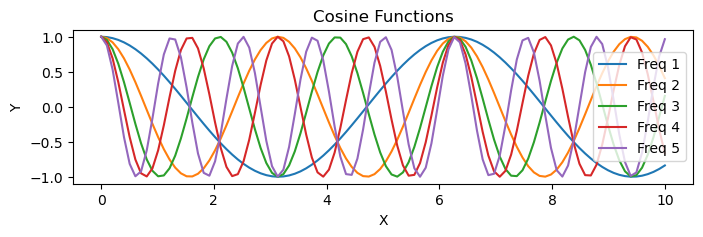

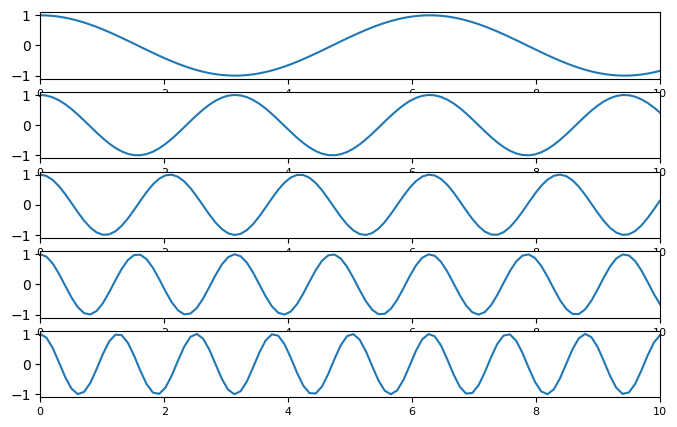

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x values
x = np.linspace(0, 10, 100)

# Generate 5 cosine functions with increasing periodicity
freqs = [1, 2, 3, 4, 5]
cosine_funcs = np.array([np.cos(freq * x) for freq in freqs])

plt.figure(figsize=(8, 2))

# TODO: Plot all cosine functions in one plot
for func in cosine_funcs:
    plt.plot(x, func)

# TODO: Add title
plt.title("Cosine Functions")

# TODO: Add x and y labels
plt.xlabel("X")
plt.ylabel("Y")

# TODO: Add x and y ticks
plt.xticks(np.arange(0, 11, 2))
plt.yticks(np.arange(-1, 1.1, 0.5))

# TODO: Add legend
plt.legend(tuple([f"Freq {freq}" for freq in freqs]))

# Show the plot
plt.show()

# Can you make the style of each function distinct?
# Yes, it is possible
# Can you make the x-axis of each function distinct?
# No, because all functions share the same plot!

# Let's try a different approach using subplots
# Define the number of rows and columns for the subplots
nrows = 5
ncols = 1

# Preparing the subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8, 5))

for i, func in enumerate(cosine_funcs):
    ax = axes[i]
    # TODO: Plot each cosine function in a separate subplot
    ax.plot(x, func)

    # TODO: Customize each x-axis with xticks, limits, and fontsize
    ax.set_xlim(0, 10)
    ax.set_xticks(np.arange(0, 11, 2))
    ax.tick_params(axis='x', labelsize=8)

# Show the plot
plt.show()

### Exercise 2: Visualizing 2D Cosine Functions

In this exercise, you will generate a 2D grid of points and plot the cosine function on this grid. Each point in the grid will correspond to a pair of x and y values, and the corresponding z value will be calculated as the cosine of the distance from the origin.

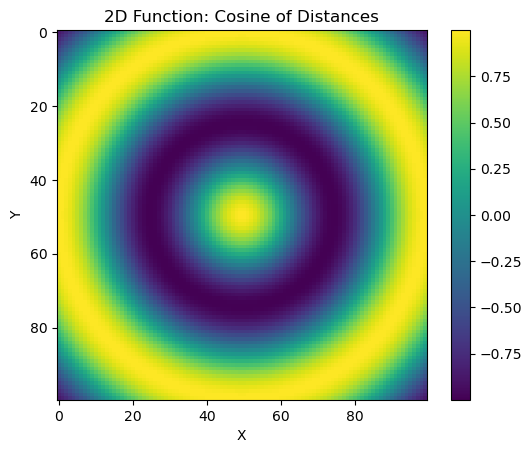

In [2]:
# Step 1: Generate a 2D grid of points
x = np.linspace(-2*np.pi, 2*np.pi, 100)
y = np.linspace(-2*np.pi, 2*np.pi, 100)

# What does meshgrid do?
X, Y = np.meshgrid(x, y)
# It creates a 2D grid (2-dimensional array) of all potential combinations from x and y

# Step 2: Calculate the distances from the origin
distances = np.hypot(X, Y)

# Step 3: Calculate the z values as the cosine of distances
Z = np.cos(distances)

# TODO: Plot the 2D-function Z. Use the imshow() method
plt.imshow(Z)

# TODO: Customizing the plot: add a title, labels, colorbar, etc.
plt.title("2D Function: Cosine of Distances")
plt.xlabel("X")
plt.ylabel("Y")
plt.colorbar()

# Display the plot
plt.show()

### Exercise 3: Combining subplots and heatmaps

In this exercise, you will load the MNIST dataset, which consists of grayscale images of handwritten digits, and create subplots with heatmaps to visualize a selection of these digits.

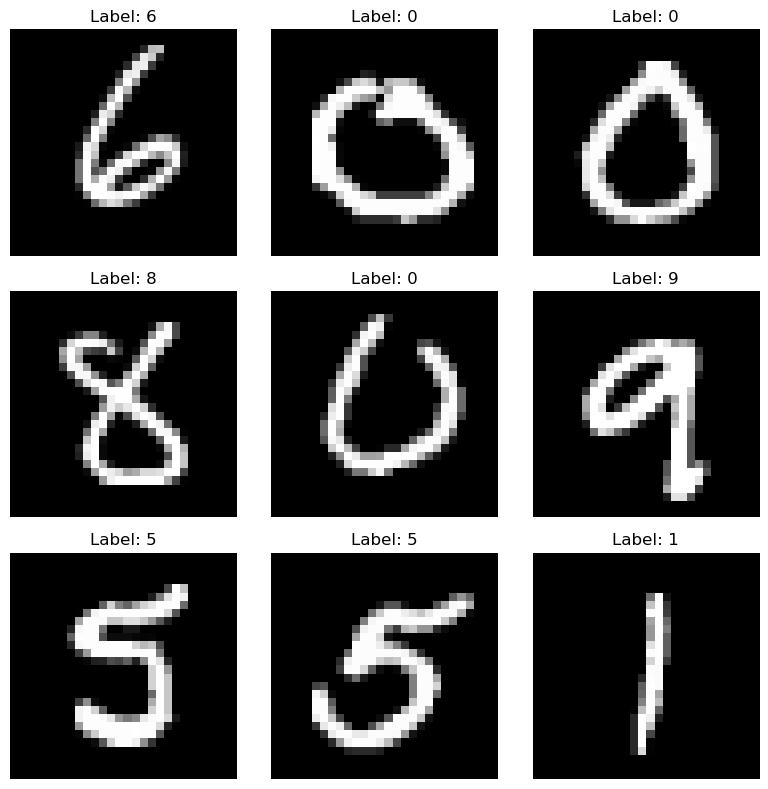

In [3]:
from keras.datasets import mnist

# Load the MNIST dataset
(train_images, train_labels), (_, _) = mnist.load_data()

# Select 9 random images from the dataset
random_indices = np.random.choice(train_images.shape[0], size=9, replace=False)
selected_images = train_images[random_indices]
selected_labels = train_labels[random_indices]

# TODO: Create a 3x3 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))

# TODO: Plot each image in a subplot. Use imshow() method
for i, ax in enumerate(axes.flat):
    ax.imshow(selected_images[i], cmap='gray')
    ax.set_axis_off()  # Remove axis ticks and labels

    # TODO: Don't forget to plot labels as well
    ax.set_title(f"Label: {selected_labels[i]}")

# TODO: Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

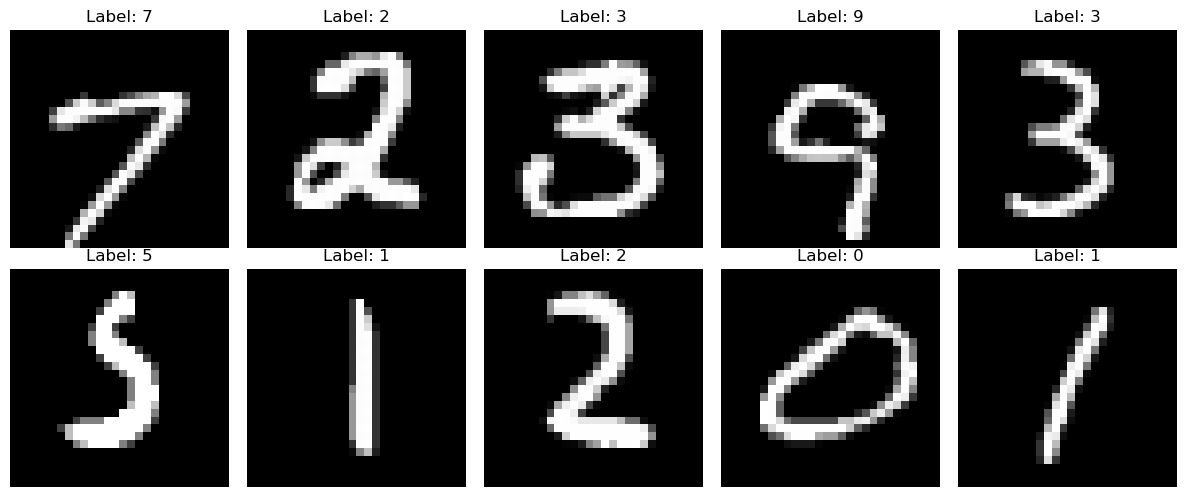

In [4]:
# Select 10 random images from the dataset
random_indices = np.random.choice(train_images.shape[0], size=10, replace=False)
selected_images = train_images[random_indices]
selected_labels = train_labels[random_indices]

# TODO: Create a 2x5 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 5))

# TODO: Plot each image in a subplot. Use imshow() method and try cmap='gray' or 'viridis' etc.
for i, ax in enumerate(axes.flat):
    ax.imshow(selected_images[i], cmap='gray')
    ax.set_axis_off()  # Remove axis ticks and labels

    # TODO: Don't forget to plot labels as well
    ax.set_title(f"Label: {selected_labels[i]}")

# TODO: Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

### Exercise 4: Subplots and 3D Scatter Plot

In this exercise, we will explore the use of Principal Component Analysis (PCA) to compare the facial features of two prominent figures: George W Bush and Tony Blair. We will load the faces dataset, extract images of George W Bush and Tony Blair, and apply PCA to reduce the dimensionality of the facial features. Finally, we will visualize the PCA features using a scatter plot, highlighting the differences between George W Bush and Tony Blair in the reduced feature space.

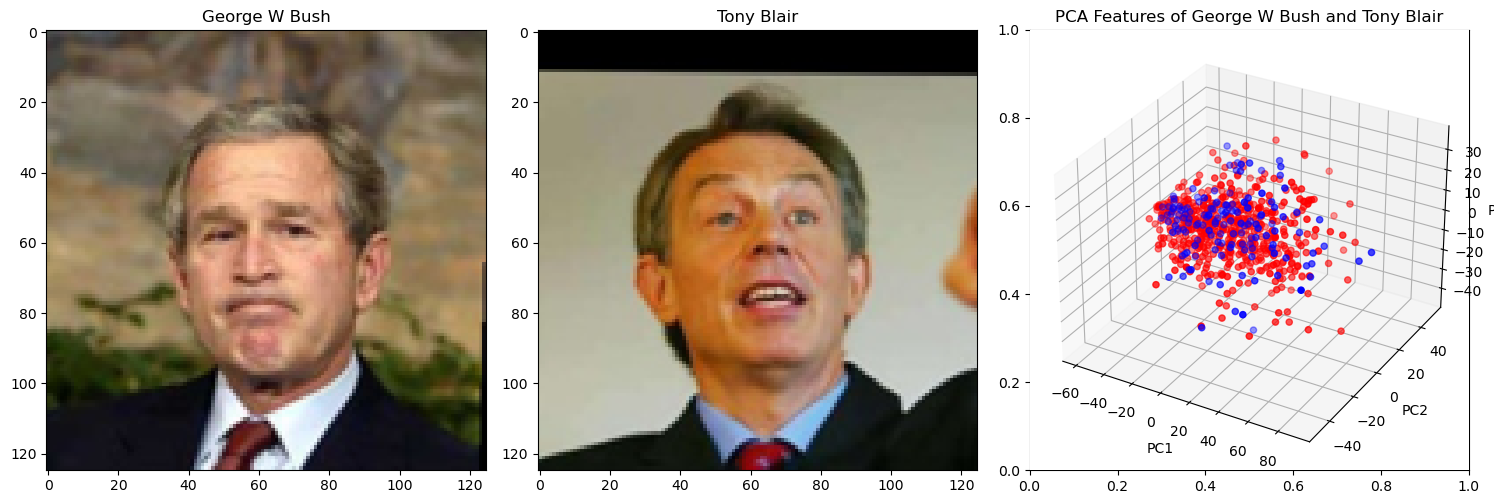

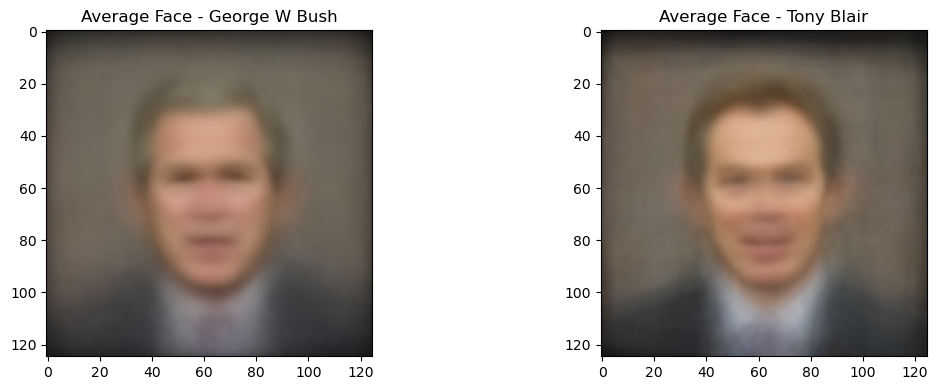

In [5]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA

# Load the faces dataset
lfw_dataset = fetch_lfw_people(min_faces_per_person=100, color=True, slice_=(slice(0,250,None), slice(0,250,None)))
X = lfw_dataset.data
y = lfw_dataset.target
target_names = lfw_dataset.target_names

# Find the indices for 'George W Bush'
george_w_bush_idx = target_names.tolist().index('George W Bush')

# Find the indices for 'Tony Blair'
tony_blair_idx = target_names.tolist().index('Tony Blair')

# Get the images and features for 'George W Bush'
george_w_bush_images = X[y == george_w_bush_idx]

# Get the images and features for 'Tony Blair'
tony_blair_images = X[y == tony_blair_idx]

# Apply PCA for dimensionality reduction
pca = PCA(n_components=3)
george_w_bush_pca = pca.fit_transform(george_w_bush_images)
tony_blair_pca = pca.transform(tony_blair_images)

# Create 1x3 subplots with size (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot images of 'George W Bush'
axs[0].imshow(george_w_bush_images[0].reshape(125, 125, 3))
axs[0].set_title('George W Bush')

# Plot images of 'Tony Blair'
axs[1].imshow(tony_blair_images[0].reshape(125, 125, 3))
axs[1].set_title('Tony Blair')

# Prepare the scatter plot of PCA features
ax = fig.add_subplot(133, projection='3d')

# Display the scatter plot of PCA features of 'George W Bush'
ax.scatter(george_w_bush_pca[:, 0], george_w_bush_pca[:, 1], george_w_bush_pca[:, 2], c='red', label='George W Bush')

# Display the scatter plot of PCA features of 'Tony Blair'
ax.scatter(tony_blair_pca[:, 0], tony_blair_pca[:, 1], tony_blair_pca[:, 2], c='blue', label='Tony Blair')

# Add title and axis description
ax.set_title('PCA Features of George W Bush and Tony Blair')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

# Show the average face of 'George W Bush' and 'Tony Blair'
average_george_w_bush_face = np.mean(george_w_bush_images, axis=0)
average_tony_blair_face = np.mean(tony_blair_images, axis=0)

# Plot the average faces
plt.figure(figsize=(12, 4))

# Plot the average face of 'George W Bush'
plt.subplot(1, 2, 1)
plt.imshow(average_george_w_bush_face.reshape(125, 125, 3))
plt.title('Average Face - George W Bush')

# Plot the average face of 'Tony Blair'
plt.subplot(1, 2, 2)
plt.imshow(average_tony_blair_face.reshape(125, 125, 3))
plt.title('Average Face - Tony Blair')

plt.tight_layout()
plt.show()